In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",50) # max columns for DataFrame


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.DataFrame(pd.read_csv('electric_vehicle.csv'))

In [5]:
df.head(10)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
5,May 31 2018,Maui,HI,Passenger,1,0,1,59,60,1.67
6,November 30 2017,Northampton,PA,Passenger,0,1,1,66,67,1.49
7,March 31 2018,Nassau,NY,Passenger,1,0,1,37,38,2.63
8,March 31 2020,DeKalb,IN,Passenger,1,0,1,1,2,50.00
9,January 31 2019,Columbia,WA,Truck,0,0,0,"1,529","1,529",0.00


In [7]:
df.shape # total of 20819 rows, 10 columns

(20819, 10)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [12]:
df['Date'] = pd.to_datetime(df['Date']) # change format of date
                            

In [13]:
df.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [16]:
df.loc[df['County'].isna()] # check if null value
df.dropna(subset = ['County'], inplace=True)


In [17]:
df.shape


(20733, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20733 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20733 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20733 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20733 non-null  object        
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20733 non-null  object        
 6   Electric Vehicle (EV) Total               20733 non-null  object        
 7   Non-Electric Vehicle Total                20733 non-null  object        
 8   Total Vehicles                            20733 non-null  object        
 9   Percent Electric Vehicles        

In [19]:
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].str.replace(',','')
df['Electric Vehicle (EV) Total'] = df['Electric Vehicle (EV) Total'].astype('float')

In [20]:
df['Battery Electric Vehicles (BEVs)'] = df['Battery Electric Vehicles (BEVs)'].str.replace(',', '')
df['Battery Electric Vehicles (BEVs)'] = df['Battery Electric Vehicles (BEVs)'].astype('float')

In [24]:
df['Plug-In Hybrid Electric Vehicles (PHEVs)'] = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].astype(str)
df['Plug-In Hybrid Electric Vehicles (PHEVs)'] = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].str.replace(',','')
df['Plug-In Hybrid Electric Vehicles (PHEVs)'] = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].astype('float')

In [25]:
df['Non-Electric Vehicle Total'] = df['Non-Electric Vehicle Total'].str.replace(',','')
df['Non-Electric Vehicle Total'] = df['Non-Electric Vehicle Total'].astype('float')

In [26]:
df['Total Vehicles'] = df['Total Vehicles'].str.replace(',', '')
df['Total Vehicles'] = df['Total Vehicles'].astype('float')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20733 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20733 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20733 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20733 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20733 non-null  float64       
 6   Electric Vehicle (EV) Total               20733 non-null  float64       
 7   Non-Electric Vehicle Total                20733 non-null  float64       
 8   Total Vehicles                            20733 non-null  float64       
 9   Percent Electric Vehicles        

In [28]:
top_ten = df.groupby('State', as_index = False)[['Electric Vehicle (EV) Total','Total Vehicles']].sum()

In [29]:
top_ten.head()

,State,Electric Vehicle (EV) Total,Total Vehicles
0,AK,183.0,11594.0
1,AL,169.0,5135.0
2,AR,69.0,487.0
3,AZ,1172.0,157198.0
4,CA,6892.0,626762.0


In [30]:
top_ten['Percent EV'] = (top_ten['Electric Vehicle (EV) Total']/top_ten['Total Vehicles'])*100

In [31]:
top_ten = top_ten.sort_values('Percent EV',ascending = False)

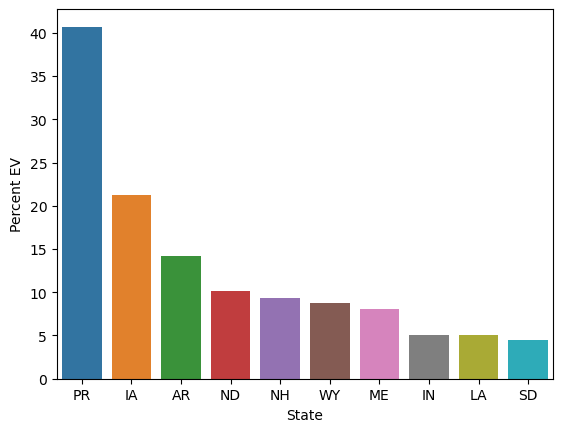

In [33]:
sns.barplot(x='State', y = 'Percent EV', data = top_ten.head(10))
plt.show()

**The above graph depicts top 10 States in terms of Percentage of EV sales and PR is on top**

In [41]:
top_ten.tail(1) # check for lowest EV sale percentage

,State,Electric Vehicle (EV) Total,Total Vehicles,Percent EV
3,AZ,1172.0,157198.0,0.745557


In [43]:
top_ten_sales = df.groupby('State', as_index = False)['Electric Vehicle (EV) Total'].sum().sort_values('Electric Vehicle (EV) Total', ascending= False)

In [46]:
top_ten_sales.head(1) # state with highest EV sale

,State,Electric Vehicle (EV) Total
47,WA,6166610.0


In [47]:
top_ten_sales.tail(1)# state with lowest EV sale

,State,Electric Vehicle (EV) Total
8,DE,16.0


In [50]:
county_top_ten = df.groupby('County',as_index = False)['Electric Vehicle (EV) Total'].sum().sort_values('Electric Vehicle (EV) Total',ascending=False)

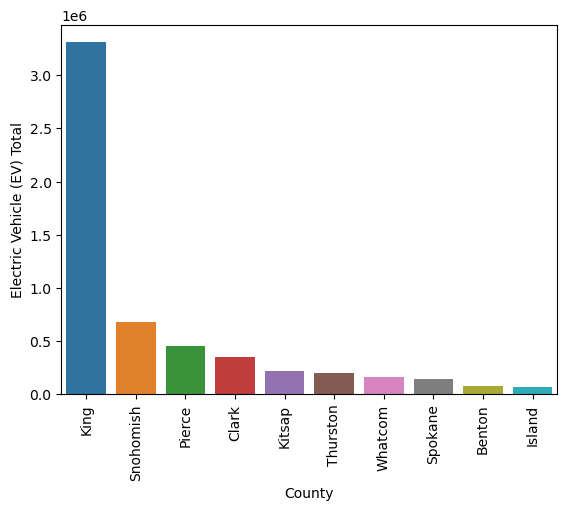

In [54]:
sns.barplot(x='County', y= 'Electric Vehicle (EV) Total', data=county_top_ten.head(10))
plt.xticks(rotation=90)
plt.show()

**The above graph depicts top 10 County's in terms of Total EV sales and King is on top**



In [56]:
county_top_ten.tail(1) # county with lowest ev total sales

,County,Electric Vehicle (EV) Total
29,Brown,1.0


In [57]:
#top 10 county's with best EV sales(percentage)
county_percentage = df.groupby('County',as_index =False)[['Electric Vehicle (EV) Total','Total Vehicles']].sum()

In [58]:
county_percentage['Percent EV']=(county_percentage['Electric Vehicle (EV) Total']/county_percentage['Total Vehicles'])*100

In [59]:
county_percentage = county_percentage.sort_values('Percent EV', ascending = False)

In [60]:
county_percentage

,County,Electric Vehicle (EV) Total,Total Vehicles,Percent EV
66,Danville,23.0,23.0,100.000000
250,Sevier,23.0,23.0,100.000000
140,Las Animas,32.0,44.0,72.727273
50,Clinton,23.0,32.0,71.875000
26,Bradley,11.0,16.0,68.750000
...,...,...,...,...
85,Ferry,1085.0,683719.0,0.158691
145,Lincoln,1631.0,1064254.0,0.153253
197,Pend Oreille,1734.0,1282713.0,0.135182
1,Adams,1758.0,1554217.0,0.113112


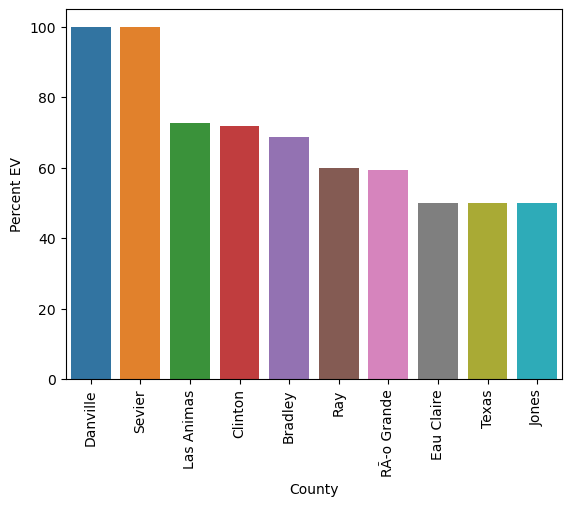

In [64]:
sns.barplot(x= 'County',y='Percent EV', data=county_percentage.head(10))
plt.xticks(rotation=90)
plt.show()

**The above graph depicts top 10 County's in terms of Percent EV sales and Danville and Sevier is on top**


In [66]:
county_percentage.tail(1) # county with lowest percentage of EV sales

,County,Electric Vehicle (EV) Total,Total Vehicles,Percent EV
93,Garfield,197.0,197570.0,0.099711


In [67]:
df.insert(1,'Sales_Year',df['Date'].map(lambda x:x.year))

In [68]:
df.head()

,Date,Sales_Year,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,2022,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50
1,2022-12-31,2022,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57
2,2020-01-31,2020,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03
3,2022-06-30,2022,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00
4,2021-07-31,2021,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19


In [69]:
year_sales = df.groupby('Sales_Year',as_index = False)[['Electric Vehicle (EV) Total','Total Vehicles']].sum()

In [70]:
year_sales['Percent EV Sales']= (year_sales['Electric Vehicle (EV) Total']/year_sales['Total Vehicles'])*100

In [71]:
year_sales

,Sales_Year,Electric Vehicle (EV) Total,Total Vehicles,Percent EV Sales
0,2017,304710.0,71648609.0,0.425284
1,2018,416573.0,72768433.0,0.572464
2,2019,577898.0,74122131.0,0.779656
3,2020,715726.0,74592015.0,0.959521
4,2021,914733.0,75173700.0,1.216826
5,2022,1214723.0,74534741.0,1.629741
6,2023,1705349.0,73829024.0,2.309863
7,2024,345135.0,12011299.0,2.873419


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales_Year', ylabel='Percent EV Sales'>

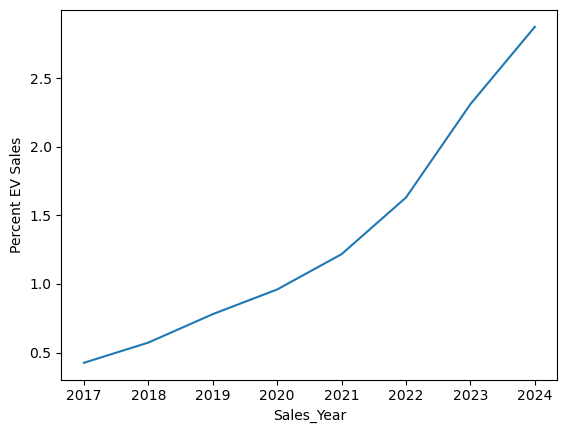

In [78]:
sns.lineplot(x= 'Sales_Year', y= 'Percent EV Sales', data=year_sales)


In [79]:
plt.show()

**The above graph depicts trend of Percent EV sales from year 2017 to 2024,demonstrating a significant positive trend**



Conclusion:

    1. PR has the highest Percentage EV Sales among the States
    2. AZ has the lowest Percentage EV Sales among the States
    3. WA has the highest Total EV Sales among the States
    4. DE has the lowest Total EV Sales among the States
    5. King has the highest Total EV Sales among the Countys
    6. Brown has the lowest Total EV Sales among the Countys
    7. Danville and Sevier has the highest Percentage EV Sales among the Countys
    8. Garfield has the lowest Percentage EV Sales among the Countys
    9. There is a positive trend for Percent EV Sales from year 2017 to 2024

